# Import python necessary libraries

In [1]:
import skimage.io as io
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code. It may be worth also reading How to make IPython notebook matplotlib plot inline for reference on how to use it in your cod

## Read an Image

In [ ]:
#io.imread?

In [2]:
#Read Image
#img = io.imread('./Data/utah.jpeg',as_grey=True)
#img = io.imread('./Data/lina.jpeg',as_grey=True)
img = data.moon()
#img = data.camera()
#img = data.coins()

### Check imported image type

In [3]:
type(img)

numpy.ndarray

## Display image

In [ ]:
#io.imshow?

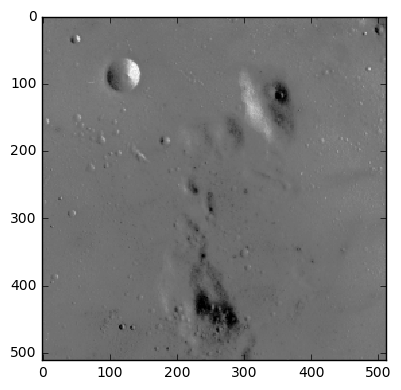

In [4]:
#Display Image
io.imshow(img,cmap=plt.cm.gray)
io.show()

# Histogram equalization

- Calculate probability of occurence of pixel of level $i$ in the image.
- Calculate cumulative distribution function.
- Interpolate original image to cumulative distribution function values.

## Calculate probability of ocurence of pixel of level $i$ in the image.

- First transform 2d image to 1d image
- Calculate the occurence of pixel intensity (histogram)
- Aslo calculate the range over which the image's pixel intensity range varies (histogram)
- Calculate the cumulative function of the occurence of pixel intensity
    - Calculate the probability of the pixel intensity occurence

** Hint: use the numpy histogram method **

In [ ]:
### put your code here
# 2D to 1D
array = np.ravel(img)
array_size = np.size(array)
img_id_bincounts, bin_edges = np.histogram(array, bins=256)

# occurence of pixel intensity
unique, counts = np.unique(array, return_counts=True)
print(unique, counts)
range_img = np.ptp(unique)
print(range_img)


occurence = []
cumul = 0
for i, pixel in enumerate(unique):
    cumul = cumul + counts[i]
    occurence.append(cumul/(array_size - 1))
    print(cumul)
    
print(np.sum(counts))
print(cumul)
print(occurence)

for_hist = [unique, occurence]
print(for_hist)

plt.figure(figsize=(12,6))
plt.style.use('ggplot')

#plot the histogram
plt.hist(for_hist, color='g', label='columns 0')
plt.title('Histogram of column 0')
plt.xlabel('Values/Ints')
plt.ylabel('Counts')
plt.legend()

plt.show()

# img_id_bincounts, bin_edges = np.histogram(img_1d, bins=256)


[  240     0    60    36     0    60    52     0    52     0    60    80
     0     4    44     0    56     0    88    72     0    80    76     0
    52    68     0    64     0    88    80     0    72    40     0    72
    36     0    48    64     0    64    48     0    28    76     0    84
    76    88     0    80   108     0    52    76    92     0    88   100
   100     0   104     0   132   108     0   148   124   168   160   160
     0   212   208   180   200   264   216   220   312   224   272   296
   284   316   252   536   368   408   372   824   352   596   456   860
   916   400   880   908   580  1860  1416  2564  2036  3392  5928  5724
 11964 11436 16256 17772 20324 21444 17484 23296 16144 12096 11748  9408
  9020  5080  5316  2776  1364  2056   872  1260   868   376   552   176
   432   192   156   252   112   136   116   104    88   116   100    88
    60   108    76   116    88    76    68    92    72     0    44    64
    56     0   112    72    76     0    96    52   

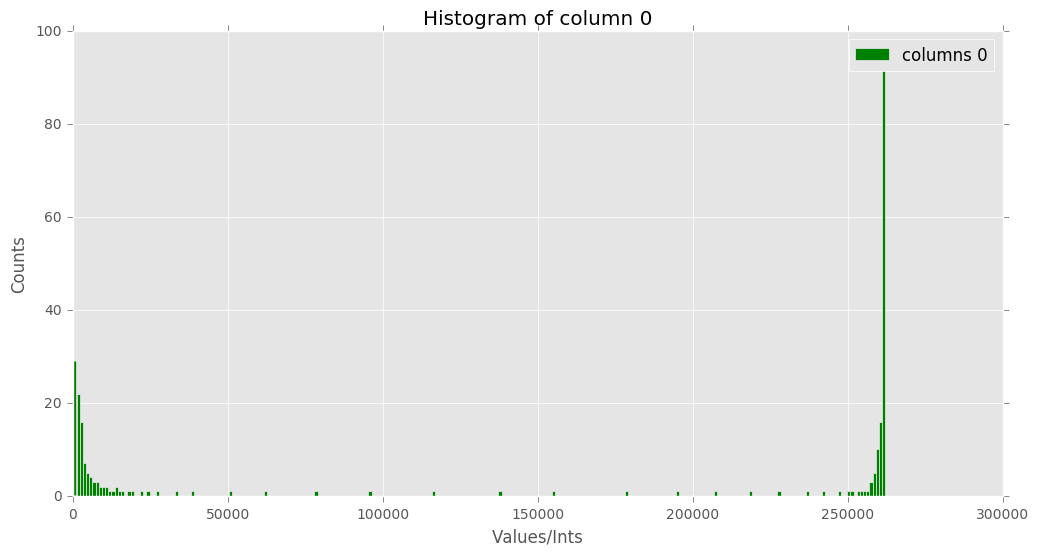

In [5]:
array = np.ravel(img)
array_size = np.size(array)
img_1d_bincounts, bin_edges = np.histogram(array, bins=256)
print(img_1d_bincounts)

cumul = np.cumsum(img_1d_bincounts)
occurence = cumul / array_size
print(occurence)

plt.figure(figsize=(12,6))
plt.style.use('ggplot')

#plot the histogram
plt.hist(cumul, bins=256, color='g', label='columns 0')
plt.title('Histogram of column 0')
plt.xlabel('Values/Ints')
plt.ylabel('Counts')
plt.legend()

plt.show()

In [ ]:
plt.figure(figsize=(12,6))
plt.style.use('ggplot')

#plot the histogram
plt.hist(occurence, bins=256, color='g', label='columns 0')
plt.title('Histogram of column 0')
plt.xlabel('Values/Ints')
plt.ylabel('Counts')
plt.legend()

## Calculate cummulative function of pixel intensities

** Hint: use the numpy cumsum method **

In [7]:
### put your code here
img_1d_bincounts_cum = np.cumsum(img_1d_bincounts)

### Plot distribution and cdf

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

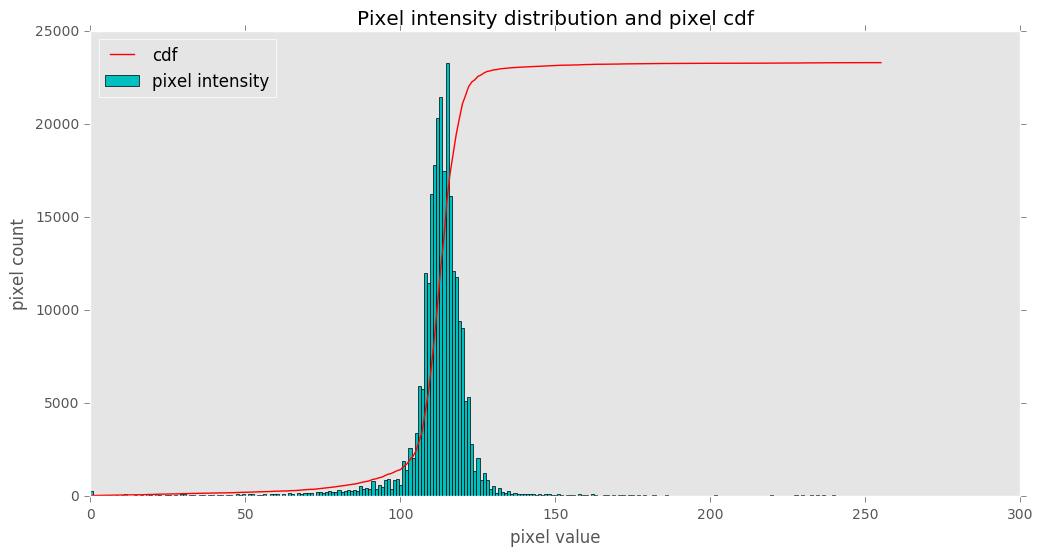

In [9]:
plt.figure(figsize=(12,6))

plt.grid()

scale_factor = np.max(img_1d_bincounts)/np.max(img_1d_bincounts_cum)

plt.hist(array,bins=len(img_1d_bincounts_cum),color='c',edgecolor='black',label='pixel intensity')
plt.plot(list(range(len(img_1d_bincounts_cum))),
         img_1d_bincounts_cum*scale_factor,color='r',label='cdf')

plt.title('Pixel intensity distribution and pixel cdf')
plt.xlabel('pixel value')
plt.ylabel('pixel count')

plt.legend(loc='best')

plt.show()

## Interpolate original image to cumulative distribution function values.

** Hint: use the numpy interp method. **

In [10]:
### put your code here
bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
#print(bin_centers)
interpolated = np.interp(array, bin_centers, img_1d_bincounts_cum)
print(interpolated.shape)


(262144,)


### Reshape Image to original image size and normalize image's pixel intenisties from 0 to 1

In [25]:
### put your code here

img_equal = np.reshape(interpolated, (512, 512))

img_equal = (img_equal - img_equal.min())/(img_equal.max() - img_equal.min())
print(img_equal)

[[ 0.74069864  0.74069864  0.94413732 ...,  0.04047042  0.04886847
   0.04886847]
 [ 0.74069864  0.74069864  0.94413732 ...,  0.04047042  0.04886847
   0.04886847]
 [ 0.74069864  0.74069864  0.94413732 ...,  0.04047042  0.04886847
   0.04886847]
 ..., 
 [ 0.23356012  0.23356012  0.43953746 ...,  0.78776166  0.74069864
   0.74069864]
 [ 0.58935479  0.58935479  0.52147594 ...,  0.83284841  0.83284841
   0.83284841]
 [ 0.58935479  0.58935479  0.52147594 ...,  0.83284841  0.83284841
   0.83284841]]


### Display histogram equalized image

/Users/jameszhang/anaconda2/envs/py_35/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


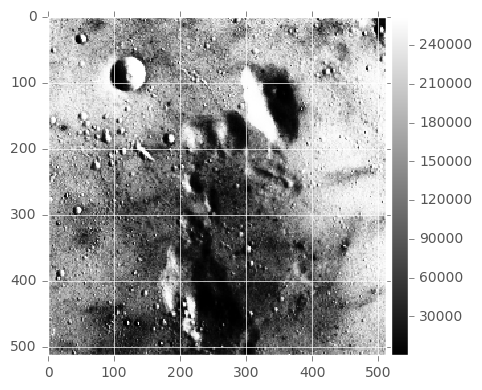

In [12]:
#Display Image
io.imshow(img_equal,cmap=plt.cm.gray)
io.show()

# SkImage - Histogram Equalization

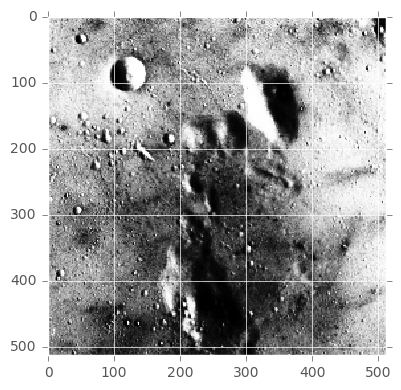

In [30]:
from skimage import exposure

# Equalization
img_eq = exposure.equalize_hist(img)

#img_eq2 = exposure.equalize_hist(img_eq)

#Display Image
io.imshow(img_eq,cmap=plt.cm.gray)
io.show()

# Equalized Image Plot

[ 0.74371338  0.74371338  0.94462585 ...,  0.83467102  0.83467102
  0.83467102]


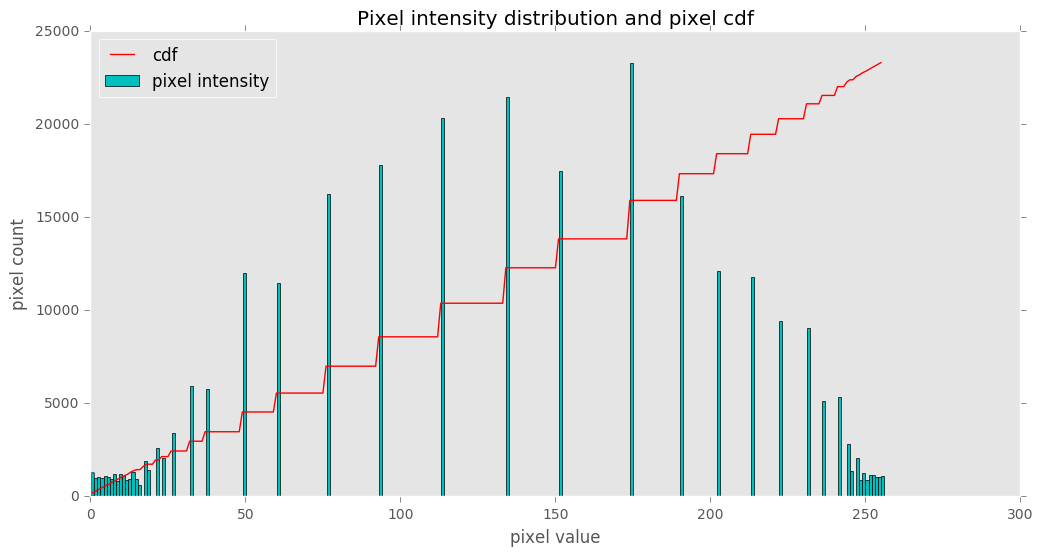

In [31]:
plt.figure(figsize=(12,6))

plt.grid()
print(img_equal.ravel())
img_1d_bincounts, bin_edges = np.histogram(img_equal.ravel(), bins=256)
img_1d_bincounts_cum = img_1d_bincounts.cumsum()

scale_factor = np.max(img_1d_bincounts)/np.max(img_1d_bincounts_cum)

plt.hist(img_equal.ravel()*256,bins=len(img_1d_bincounts_cum),color='c',edgecolor='black',label='pixel intensity')
plt.plot(list(range(len(img_1d_bincounts_cum))),
         img_1d_bincounts_cum*scale_factor,color='r',label='cdf')

plt.title('Pixel intensity distribution and pixel cdf')
plt.xlabel('pixel value')
plt.ylabel('pixel count')

plt.legend(loc='best')

plt.show()